<a href="https://colab.research.google.com/github/masadlara/ChurnHackathon/blob/main/Churn_Prediction_in_Telecom_Industry_SkyOne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Churn Prediction in Telecom Industry - SkyOne

##1. Notebook Description

This notebook presents a comprehensive analysis of customer churn prediction in a telecom company - SkyOne. The primary objective is to develop an accurate predictive model that identifies customers likely to churn and suggest proactive measures for retention.

The notebook begins with data exploration, including descriptive statistics, visualization of key variables, outlier detection, dimension redcution, correlation analysis and clustering.

The main analysis focuses on building a churn prediction model using logistic regression. The notebook demonstrates the step-by-step process of data preprocessing, model training, evaluation, and interpretation of the results. Techniques such as train-test split, and performance metrics are employed.

Additionally, the notebook explores the relationships between variables through correlation analysis and investigates the presence of multicollinearity. It also applies dimensionality reduction techniques, such as Principal Component Analysis (PCA), to handle high-dimensional data.

The findings are presented through clear visualizations and insightful interpretations. The notebook concludes with suggestions for proactive measures to reduce customer churn and improve customer retention based on the model's predictions.

This notebook serves as a comprehensive guide for understanding the data, building an accurate churn prediction model, and extracting actionable insights to support business decision-making in the telecom company - SkyOne.

##2. Load Needed Libraries

This section shows loading the needed libraries for this case study

In [ ]:
#import the libraries
import pandas as pd
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from plotly.offline import iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots

##3. Load Dataset

This section shows loading the provided dataset for this case study, along with exploring how the data looks like, how many rows and columns it has and what titles the columns have within this dataset.

In [ ]:
#load dataset
from google.colab import files
uploaded = files.upload()

Saving Churn_Data_File.csv to Churn_Data_File (3).csv


###3.1 Load Dataset into a Dataframe

In [ ]:
#load data into dataframe
df=pd.read_csv('Churn_Data_File.csv')
df.head(6)

,customerID,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,No
1,5575-GNVDE,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Yes
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Yes
5,9305-CDSKC,Month-to-month,Yes,Electronic check,99.65,820.5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Yes


###3.2 Show number of columns & rows

In [ ]:
#show the number of rows & columns
df.shape

(7043, 21)

There are 7,043 rows (customers) with 21 columns (predictor variables) in this dataset


###3.3 Show all Columns

In [ ]:
#show titles of all columns
df.columns.values

array(['customerID', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen',
       'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Churn'], dtype=object)

Some of the columns seem irrelevant to the needed data analysis such as customerID i.e. customer ID does not play a role in predicting whether or not a customer is likely to churn

##4. Data Exploration & Cleaning

The Data Exploration and Cleaning section focuses on understanding the dataset and preparing it for further analysis. This section encompasses several subsections, including checking for data types, handling missing/null and N/A values, and removing unnecessary columns, to ensure the dataset is of high quality, accurate, complete, and suitable for subsequent analyses.

###4.1 Data Types of Dataset Columns

This subsection examines the data types of variables within the dataset. It identifies the types of variables present, such as numerical (integer, float) or categorical (string, boolean). Understanding the data types helps determine appropriate analysis techniques and identify any inconsistencies or data type conversions needed.

Missing, null or N/A values within the dataset are addressed. It includes techniques such as identifying the extent of missingness, imputation methods (mean, median, mode), or deletion strategies to handle missing values. Dealing with missing values ensures the dataset's completeness and prevents biases in subsequent analyses.

In [ ]:
#display data types of dataset columns
df.dtypes

customerID           object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Churn                object
dtype: object

The total charges and monthly charges should have the same data type. Since the total charges data type is object type, while the monthly charges data type is float64. Total charges column should be checked! Let's check the values of total charges column...

####4.1.1 Checking values in Total Charges Column

In [ ]:
#display values of Total Charges Column
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

Since the data points are listed with single quotes ''; they are considered as strings although they are numeric values.

Hence, they should be converted from string to numeric as follows:

In [ ]:
#convert values from string to numeric for all cells in Total Charges Column
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

**Important Note:**

At first, we got an error from running the code as (pd.to_numeric(df.TotalCharges)) since some of the cells in this column are empty.

This issue is resolved by adding (errors='coerce') within our code to force conversion of all cells from string to numeric!

Now that all of our values are numeric, let's address the null/missing values in this column...

####4.1.2 Addressing the Null/Missing Values in Total Charges Column

In [ ]:
#display rows that have null/missing values in the Total Charges Column
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,customerID,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
488,4472-LVYGI,Two year,Yes,Bank transfer (automatic),52.55,,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,No
753,3115-CZMZD,Two year,No,Mailed check,20.25,,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No
936,5709-LVOEQ,Two year,No,Mailed check,80.85,,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,No
1082,4367-NUYAO,Two year,No,Mailed check,25.75,,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No
1340,1371-DWPAZ,Two year,No,Credit card (automatic),56.05,,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,No
3331,7644-OMVMY,Two year,No,Mailed check,19.85,,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No
3826,3213-VVOLG,Two year,No,Mailed check,25.35,,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No
4380,2520-SGTTA,Two year,No,Mailed check,20.00,,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No
5218,2923-ARZLG,One year,Yes,Mailed check,19.70,,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No
6670,4075-WKNIU,Two year,No,Mailed check,73.35,,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,No


Now, we want to know, how many rows are missing the Total Charges value so we run the below code:

In [ ]:
#display how many rows are missing the Total Charges Value
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 21)

11 rows (customers) have the total charges value missing (empty cells).

There are different ways to deal with missing values in datasets but we choose to drop these rows since the dataset is large and 11 rows will not have that much of a big effect on our data. We are dropping these rows to make sure our dataset is clean and error-free and to ensure it does not impact the accuracy of our model.

In order to drop the rows with missing values, we create a new data frame and we run the below code:

In [ ]:
#dropping the rows with empty cells in the Total Charges Column & creating a new dataset (df1)
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 21)

Our new dataset includes 7,032 rows (customers) and 21 columns (predictor variables).

To ensure that the actions taken to detect and remove missing values are the suitable actions to fix the issue with this the Total Charges column, we will run the old code again on the updated data frame but without the (errors='coerce') part as follows:

**Converting Total Charges Column Values into Numeric Values**

In [ ]:
#convert values from string to numeric for all cells in Total Charges Column in the new dataframe df1
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

Since the issue was resolved with this column, now we can convert the data into numeric as follows:

In [ ]:
#after removing null/missing value rows, convert from object to numeric values in the new dataframe df1
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

<ipython-input-79-6621c3e7ffff>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#display values of Total Charges Column in the new dataframe df1
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

Since the data points are no longer listed with single quotes ''; it is confirmed that they are numeric values.

In [ ]:
#display data types of dataset columns in the new dataframe df1
df1.dtypes

customerID           object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Churn                object
dtype: object

Now, the Total Charges column has a data type of float64, just like the Monthly Charges Column

####4.1.3 Addressing the N/A values in the Dataset

In [ ]:
#count number of cells having N/A values in the new dataframe df1
df1.isna().sum()

customerID          0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Churn               0
dtype: int64

There are no columns that have N/A values in our dataset. Therefore, no cleaning is needed.

###4.2 Removing Unnecessary Columns from the Dataset

This subsection focuses on identifying and removing unnecessary columns from the dataset. It involves assessing the relevance and significance of each column to the analysis objectives. Columns that contain redundant, irrelevant, or duplicated information are removed, streamlining the dataset and reducing dimensionality.

The first column that shows the sequential number of each customer (from 0 to 7043) was removed manually using Microsoft Excel.

As for the remainder columns, the column "CustomerID" seems irrelevant to our data analysis. Hence, we use the below code to drop this column:

In [ ]:
#remove customerID column from new dataframe df1
df1.drop('customerID', axis='columns', inplace =True)

<ipython-input-83-ca47f918abc2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#show first few rows of the new dataframe df1
df1.head()

,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,No
1,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,No
2,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Yes
3,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No
4,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Yes


We notice that the customerID column is removed and to double check, we run the below code:

In [ ]:
#show the number of rows & columns of the new dataframe df1
df1.shape

(7032, 20)

The number of columns decreased from 21 to 20.

##5. Exploratory Data Analysis (EDA)

The Exploratory Data Analysis (EDA) section focuses on gaining insights and understanding the dataset before proceeding with further analysis. This section employs various techniques such as descriptive statistics, data visualization, outlier detection, dimension reduction, correlation analysis, and clustering.

By leveraging these techniques, it explores the data's characteristics, distributions, relationships, and potential patterns in addition to uncovering valuable insights and paving the way for further analysis, modeling, and decision-making processes.

###5.1 Descriptive Statistics

This subsection presents descriptive statistics to summarize the dataset's numerical variables. It includes measures of central tendency, dispersion, and distribution shape. Key statistics such as mean, median, standard deviation, and percentiles provide initial insights into the numerical features.

####5.1.1 Statistical Summary

In [ ]:
#show discriptive statistics of new dataframe df1
df1.describe()

,MonthlyCharges,TotalCharges,SeniorCitizen,tenure
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,64.798208,2283.300441,0.162400,32.421786
std,30.085974,2266.771362,0.368844,24.545260
min,18.250000,18.800000,0.000000,1.000000
25%,35.587500,401.450000,0.000000,9.000000
50%,70.350000,1397.475000,0.000000,29.000000
75%,89.862500,3794.737500,0.000000,55.000000
max,118.750000,8684.800000,1.000000,72.000000


Based on the above descriptive statistics of our continuous predictor variables within our dataset, the below can be observed:

**Monthly Charges:**

The mean monthly charge is 64.8 0USD, with a standard deviation of 30.09 USD. The minimum and maximum values are 18.25 USD and 118.75 USD, respectively. The 25th percentile indicates that 25% of the customers have a monthly charge of 35.59 USD or lower, while the 75th percentile shows that 75% of the customers have a monthly charge of 89.86 USD or lower.

**Total Charges:**

The mean total charge is 2,283.30 USD, with a standard deviation of 2,266.77 USD. The minimum and maximum values are 18.80 USD and 8,684.80 USD, respectively. The 25th percentile indicates that 25% of the customers have a total charge of 401.45 USD or lower, while the 75th percentile shows that 75% of the customers have a total charge of 3,794.74 USD or lower.

**Tenure:**

The mean tenure of customers is approximately 32.42 months, with a standard deviation of 24.55 months. The minimum tenure is 1 month, while the maximum tenure is 72 months. The 25th percentile suggests that 25% of the customers have a tenure of 9 months or lower, while the 75th percentile indicates that 75% of the customers have a tenure of 55 months or lower.

####5.1.2 Customer Churn Counts

In [ ]:
df1['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

This information provides insights into the churn status of customers within the dataset. The majority of customers (5,163) are categorized as "No" churn, indicating that they have not churned or discontinued their services. On the other hand, a smaller group of customers (1,869) is categorized as "Yes" churn, indicating that they have churned or discontinued their services.

####5.1.3 Customer Churn Percentages

We will create a couple of counts first so that we can calculate the percentage of customer churn in our dataset

In [ ]:
num_retained = df1[df1.Churn=='No'].shape[0]
num_churned = df1[df1.Churn=='Yes'].shape[0]
print(num_retained/ (num_retained+num_churned)* 100, '% of customers stayed with Sky One.')
print(num_churned/ (num_retained+num_churned)* 100, '% of customers left Sky One.')

73.42150170648463 % of customers stayed with Sky One.
26.578498293515356 % of customers left Sky One.


Approximately 73.42% of customers chose to stay with Sky One. This indicates that the majority of customers have not churned or discontinued their services. They have remained loyal to Sky One and continue to be active customers.

Approximately 26.58% of customers have left Sky One. This implies that a portion of customers has churned or discontinued their services with the company. These customers have chosen to terminate their relationship with Sky One and may have switched to a competitor or opted for a different telecom service provider.

###5.2 Data Visualization

Data visualization techniques are employed to visually explore the dataset. This subsection utilizes various plots such as histograms, box plots, scatter plots, and bar charts to understand variable distributions, identify outliers, and discover potential relationships or patterns within the data.

####5.2.1 Visualization of Customer Churn Counts

<Axes: xlabel='Churn', ylabel='count'>

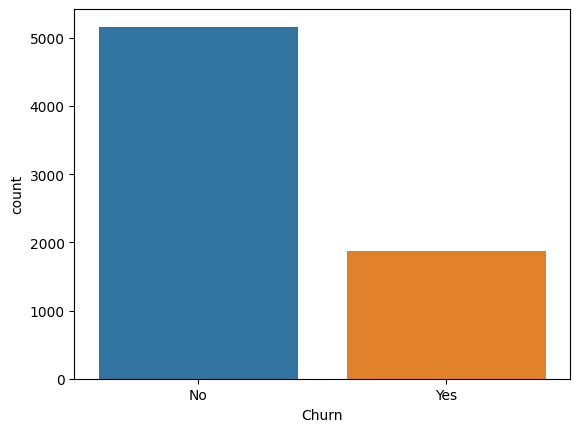

In [ ]:
sns.countplot(data=df1, x='Churn')

This visual just gives a graphic format for the counts of churn/no churn obtained in a previous section.
The majority of customers (5,163) are categorized as "No" churn, indicating that they have not churned or discontinued their services. On the other hand, a smaller group of customers (1,869) is categorized as "Yes" churn, indicating that they have churned or discontinued their services.

#####5.2.1.1 Visualization of Customer Churn Counts vs. Tenure

<Axes: xlabel='tenure', ylabel='Churn'>

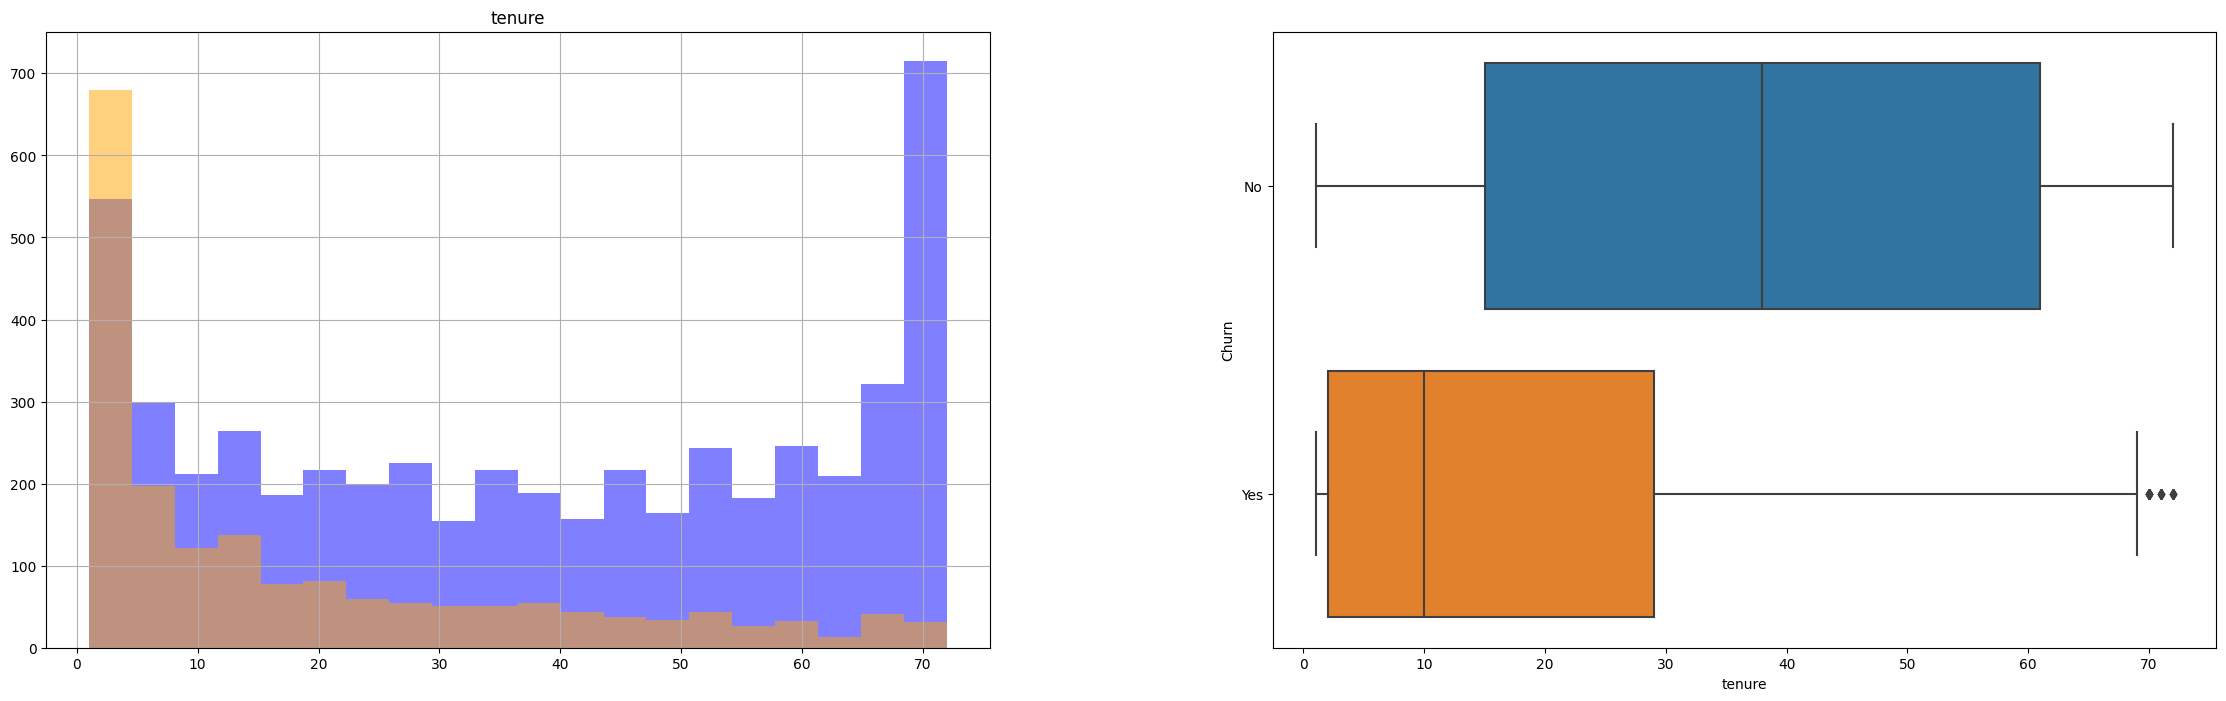

In [ ]:
numerical_features = ['tenure']
fig, (ax_hist, ax_box)=plt.subplots(1,2,figsize=(28,8))

df1[df1.Churn=='No'][numerical_features].hist(bins=20, color='blue', alpha=0.5,ax=ax_hist)
df1[df1.Churn=='Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5,ax=ax_hist)

sns.boxplot(x='tenure', y='Churn', data=df1, ax=ax_box)

As shown in the above histogram & boxplot, the below highlights can be made:

1.   Most of the customers who are staying/ not churning are the ones with the higher tenure between (65-72 months)

2.   Most of the customers who are leaving/ churning are the ones with the lower tenure between (0-10 months)

Hence, tenure plays a major role in our prediction model as a predictor of our target variable (Churn). Therefore, it should be **kept**.

#####5.2.1.2 Visualization of Customer Churn Counts vs. Monthly Charges

<Axes: xlabel='MonthlyCharges', ylabel='Churn'>

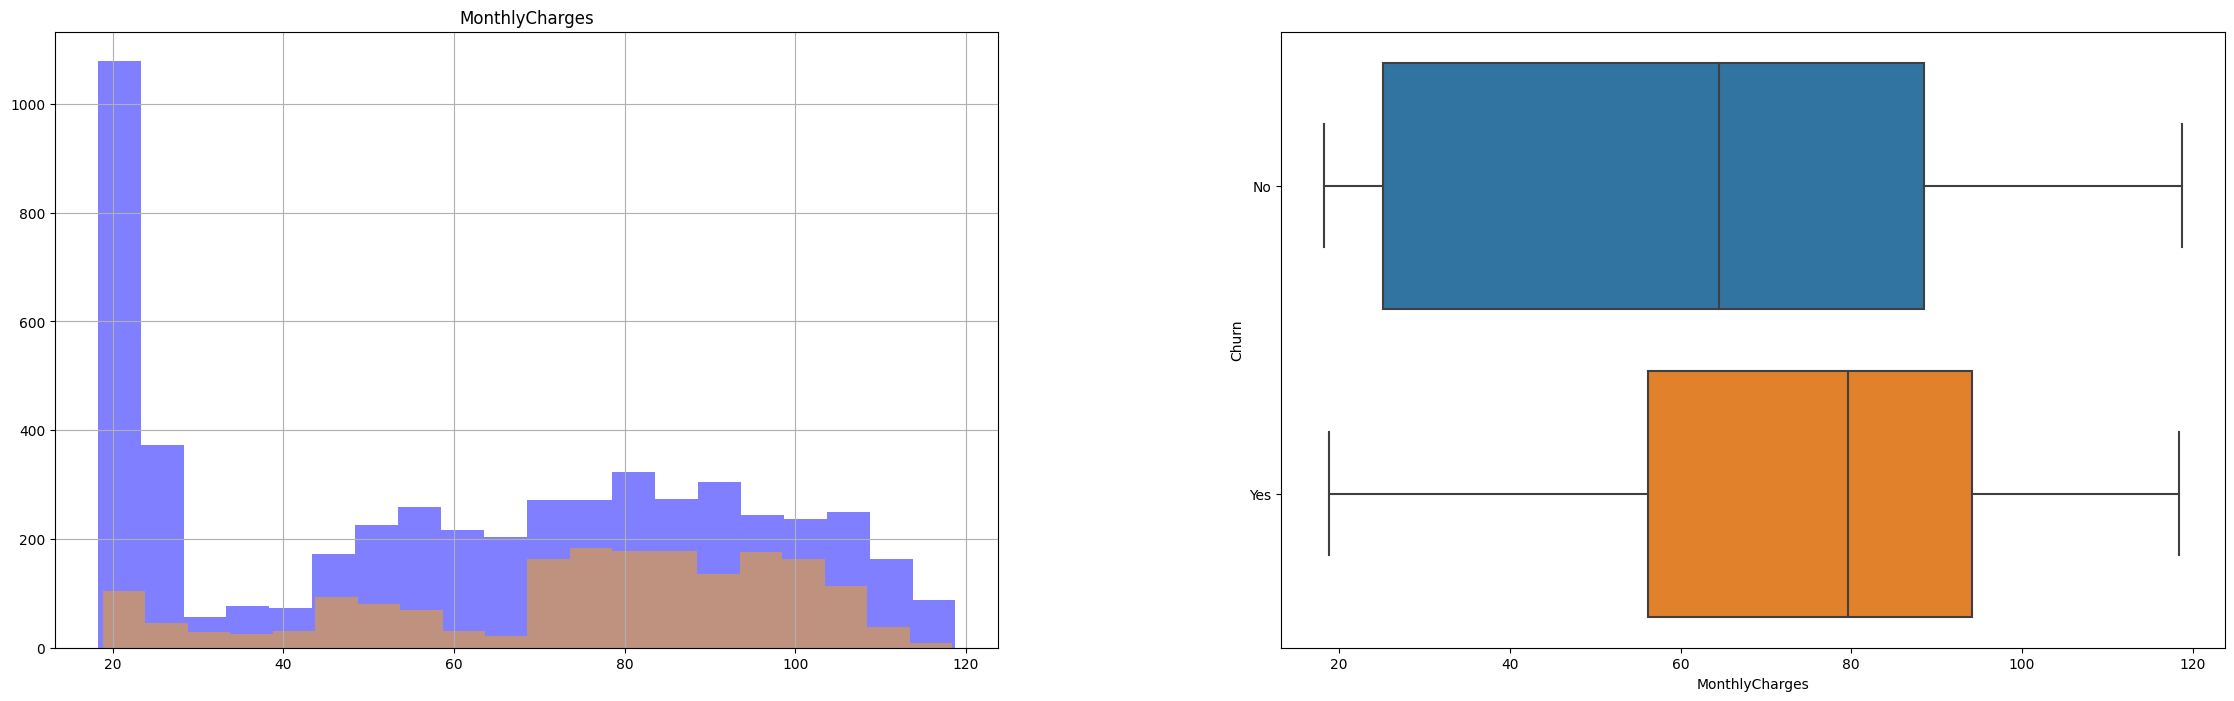

In [ ]:
numerical_features = ['MonthlyCharges']
fig, (ax_hist, ax_box)=plt.subplots(1,2,figsize=(28,8))

df1[df1.Churn=='No'][numerical_features].hist(bins=20, color='blue', alpha=0.5,ax=ax_hist)
df1[df1.Churn=='Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5,ax=ax_hist)

sns.boxplot(x='MonthlyCharges', y='Churn', data=df1, ax=ax_box)

As shown in the above histogram & boxplot, the below highlights can be made:

1.   Most of the customers who are staying/ not churning are the ones with the least monthly charges between (less than 20 to 30 USD)
2.   Most of customers leaving/ churning are the ones with the monthly charges ranging between 70-100

Hence, monthly charges plays a major role in our prediction model as a predictor of our target variable (Churn). Therefore, it should be **kept**.

#####5.2.1.3 Visualization of Customer Churn Counts vs. Total Charges

<Axes: xlabel='TotalCharges', ylabel='Churn'>

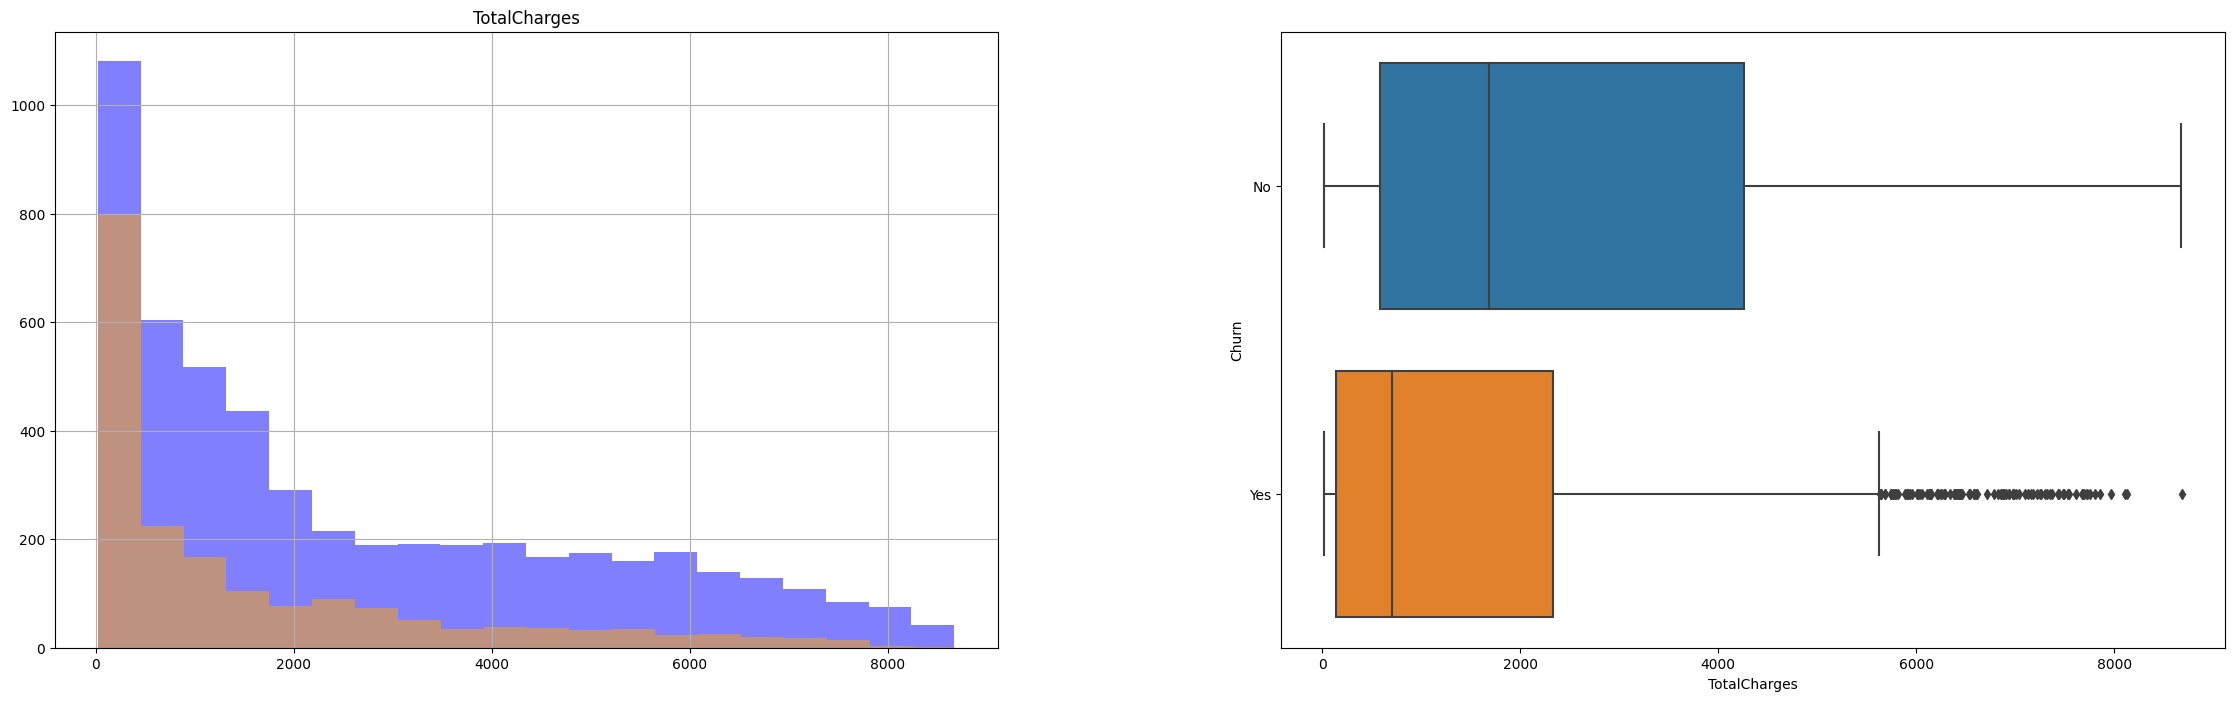

In [ ]:
numerical_features = ['TotalCharges']
fig, (ax_hist, ax_box)=plt.subplots(1,2,figsize=(28,8))

df1[df1.Churn=='No'][numerical_features].hist(bins=20, color='blue', alpha=0.5,ax=ax_hist)
df1[df1.Churn=='Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5,ax=ax_hist)

sns.boxplot(x='TotalCharges', y='Churn', data=df1, ax=ax_box)

As shown in the above histogram & boxplot, the below highlights can be made:

1.   Most of the customers who are staying/ not churning are the ones with the least total charges (up to 400 USD)
2.   Most of customers leaving/ churning are also located in the same range

Hence, total charges does NOT seem to play a major role in our prediction model as a predictor of our target variable (Churn). Therefore, it can be **removed**.

####5.2.2 Visualization of Customer Churn Percentages

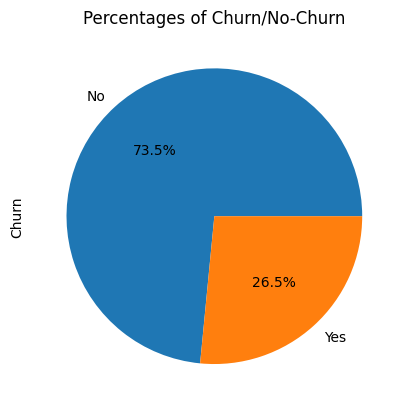

In [ ]:
# Calculate value counts of 'Churn'
churn_counts = df['Churn'].value_counts()

# Plot pie chart
churn_counts.plot.pie(autopct='%1.1f%%')

# Set plot title
plt.title('Percentages of Churn/No-Churn')

# Display the chart
plt.show()

This visual just gives a graphic format for the counts of churn/no churn obtained in a previous section.

Approximately 73.42% of customers chose to stay with Sky One. This indicates that the majority of customers have not churned or discontinued their services. They have remained loyal to Sky One and continue to be active customers.

Approximately 26.58% of customers have left Sky One. This implies that a portion of customers has churned or discontinued their services with the company. These customers have chosen to terminate their relationship with Sky One and may have switched to a competitor or opted for a different telecom service provider.

#####5.2.2.1 Visualization of Customer Churn Percentages vs. Gender

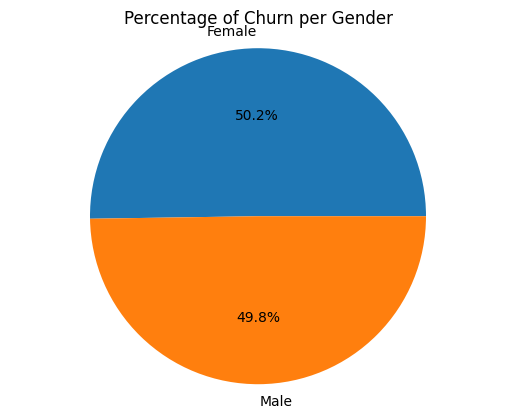

In [ ]:
# Calculate value counts of 'Gender' for churned customers
churn_gender_counts = df1[df1['Churn'] == 'Yes']['gender'].value_counts()

# Create a DataFrame with counts and genders
churn_gender_df = pd.DataFrame({'Count': churn_gender_counts.values}, index=churn_gender_counts.index)

# Plot the pie chart
plt.pie(churn_gender_df['Count'], labels=churn_gender_df.index, autopct='%.1f%%')

# Set the title of the plot
plt.title('Percentage of Churn per Gender')

# Set aspect ratio to 'equal' for a circular pie chart
plt.axis('equal')

# Display the chart
plt.show()

As shown in the above pie chart, it is observed that females and males have similar percentages of churn.

Hence, gender does NOT seem to play a major role in our prediction model as a predictor of our target variable (Churn). Therefore, it can be **removed**.

#####5.2.2.2 Visualization of Customer Churn Percentages vs. Senior Citizen

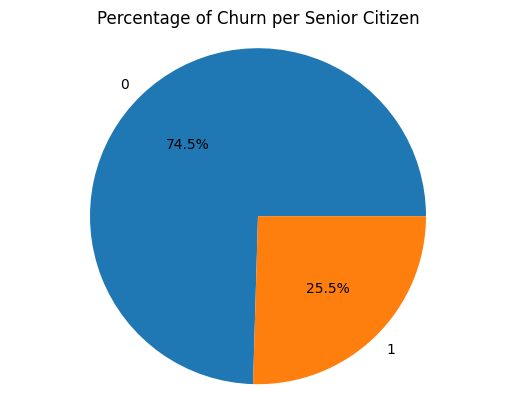

In [ ]:
# Calculate value counts of 'SeniorCitizen' for churned customers
churn_senior_counts = df[df['Churn'] == 'Yes']['SeniorCitizen'].value_counts()

# Create a DataFrame with counts and SeniorCitizen values
churn_senior_df = pd.DataFrame({'Count': churn_senior_counts.values}, index=churn_senior_counts.index)

# Plot the pie chart
plt.pie(churn_senior_df['Count'], labels=churn_senior_df.index, autopct='%.1f%%')

# Set the title of the plot
plt.title('Percentage of Churn per Senior Citizen')

# Set aspect ratio to 'equal' for a circular pie chart
plt.axis('equal')

# Display the chart
plt.show()

As shown in the above pie chart, it is observed that citizens that are not senior are more likely to churn i.e. have a higher percentage of churn.

Hence, senior citizen factor plays a major role in our prediction model as a predictor of our target variable (Churn). Therefore, it can be **kept**.

#####5.2.2.3 Visualization of Customer Churn Percentages vs. Partner Presence

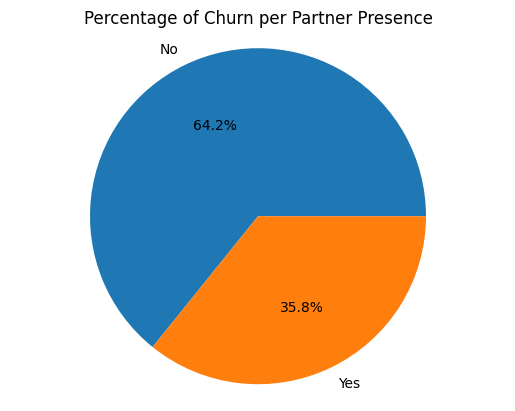

In [ ]:
# Calculate value counts of 'Partner' for churned customers
churn_partner_counts = df[df['Churn'] == 'Yes']['Partner'].value_counts()

# Create a DataFrame with counts and partner presence values
churn_partner_df = pd.DataFrame({'Count': churn_partner_counts.values}, index=churn_partner_counts.index)

# Plot the pie chart
plt.pie(churn_partner_df['Count'], labels=churn_partner_df.index, autopct='%.1f%%')

# Set the title of the plot
plt.title('Percentage of Churn per Partner Presence')

# Set aspect ratio to 'equal' for a circular pie chart
plt.axis('equal')

# Display the chart
plt.show()

As shown in the above pie chart, it is observed that customers with no partner  are more likely to churn i.e. have a higher percentage of churn.

Hence, partner presence plays a major role in our prediction model as a predictor of our target variable (Churn). Therefore, it can be **kept**.

#####5.2.2.4 Visualization of Customer Churn Percentages vs. Dependents Presence

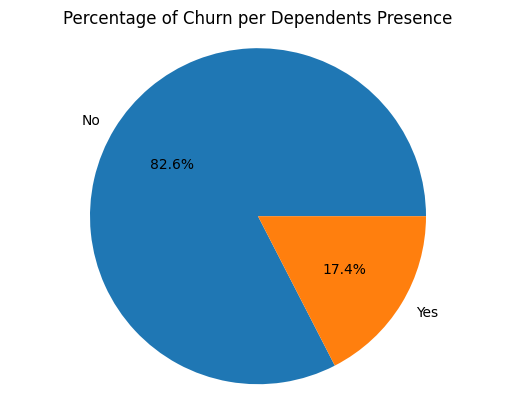

In [ ]:
# Calculate value counts of 'Dependents' for churned customers
churn_dependents_counts = df[df['Churn'] == 'Yes']['Dependents'].value_counts()

# Create a DataFrame with counts and dependents presence values
churn_dependents_df = pd.DataFrame({'Count': churn_dependents_counts.values}, index=churn_dependents_counts.index)

# Plot the pie chart
plt.pie(churn_dependents_df['Count'], labels=churn_dependents_df.index, autopct='%.1f%%')

# Set the title of the plot
plt.title('Percentage of Churn per Dependents Presence')

# Set aspect ratio to 'equal' for a circular pie chart
plt.axis('equal')

# Display the chart
plt.show()

As shown in the above pie chart, it is observed that customers with no dependents are more likely to churn i.e. have a higher percentage of churn.

Hence, dependents presence plays a major role in our prediction model as a predictor of our target variable (Churn). Therefore, it can be **kept**.

#####5.2.2.5 Visualization of Customer Churn Percentages vs. Contract Type

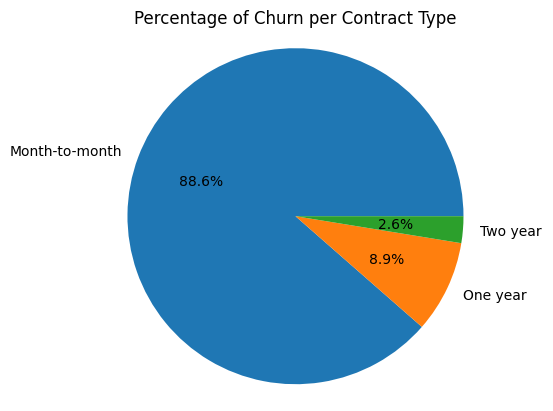

In [ ]:
# Calculate value counts of 'Contract' for churned customers
churn_contract_counts = df1[df1['Churn'] == 'Yes']['Contract'].value_counts()

# Create a DataFrame with counts and contract types
churn_contract_df = pd.DataFrame({'Count': churn_contract_counts.values}, index=churn_contract_counts.index)

# Plot the pie chart
plt.pie(churn_contract_df['Count'], labels=churn_contract_df.index, autopct='%.1f%%')

# Set the title of the plot
plt.title('Percentage of Churn per Contract Type')

# Set aspect ratio to 'equal' for a circular pie chart
plt.axis('equal')

# Display the chart
plt.show()

As shown in the above pie chart, it is observed that customers with month-to-month contracts are more likely to churn i.e. have a higher percentage of churn.

Hence, contract type plays a major role in our prediction model as a predictor of our target variable (Churn). Therefore, it can be **kept**.

#####5.2.2.6 Visualization of Customer Churn Percentages vs. Paperless Billing

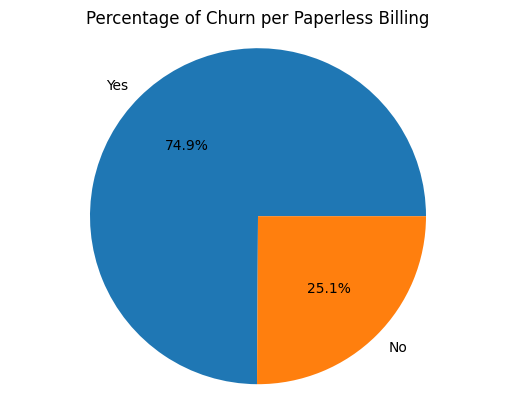

In [ ]:
# Calculate value counts of 'PaperlessBilling' for churned customers
churn_paperless_counts = df[df['Churn'] == 'Yes']['PaperlessBilling'].value_counts()

# Create a DataFrame with counts and PaperlessBilling values
churn_paperless_df = pd.DataFrame({'Count': churn_paperless_counts.values}, index=churn_paperless_counts.index)

# Plot the pie chart
plt.pie(churn_paperless_df['Count'], labels=churn_paperless_df.index, autopct='%.1f%%')

# Set the title of the plot
plt.title('Percentage of Churn per Paperless Billing')

# Set aspect ratio to 'equal' for a circular pie chart
plt.axis('equal')

# Display the chart
plt.show()

As shown in the above pie chart, it is observed that customers with paperless billing are more likely to churn i.e. have a higher percentage of churn.

Hence, paperless billing plays a major role in our prediction model as a predictor of our target variable (Churn). Therefore, it can be **kept**.

#####5.2.2.7 Visualization of Customer Churn Percentages vs. Payment Method

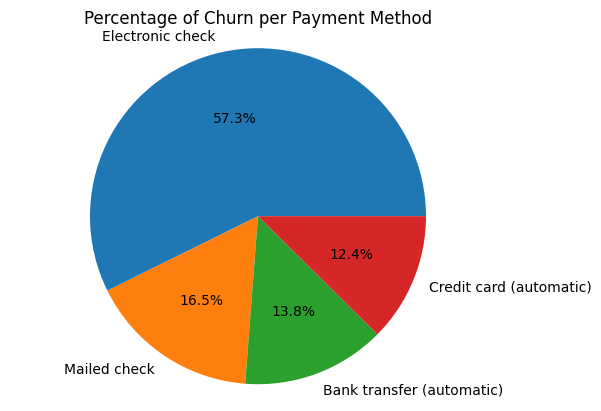

In [ ]:
# Calculate value counts of 'PaymentMethod' for churned customers
churn_payment_counts = df[df['Churn'] == 'Yes']['PaymentMethod'].value_counts()

# Create a DataFrame with counts and PaymentMethod values
churn_payment_df = pd.DataFrame({'Count': churn_payment_counts.values}, index=churn_payment_counts.index)

# Plot the pie chart
plt.pie(churn_payment_df['Count'], labels=churn_payment_df.index, autopct='%.1f%%')

# Set the title of the plot
plt.title('Percentage of Churn per Payment Method')

# Set aspect ratio to 'equal' for a circular pie chart
plt.axis('equal')

# Display the chart
plt.show()

As shown in the above pie chart, it is observed that customers with the electronic check as a payment method are more likely to churn i.e. have a higher percentage of churn.

Hence, payment method plays a major role in our prediction model as a predictor of our target variable (Churn). Therefore, it can be **kept**.

#####5.2.2.8 Visualization of Customer Churn Percentages vs. Phone Service

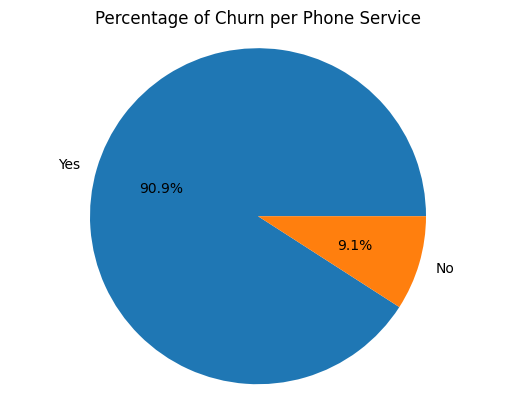

In [ ]:
# Calculate value counts of 'PhoneService' for churned customers
churn_phoneservice_counts = df[df['Churn'] == 'Yes']['PhoneService'].value_counts()

# Create a DataFrame with counts and PhoneService values
churn_phoneservice_df = pd.DataFrame({'Count': churn_phoneservice_counts.values}, index=churn_phoneservice_counts.index)

# Plot the pie chart
plt.pie(churn_phoneservice_df['Count'], labels=churn_phoneservice_df.index, autopct='%.1f%%')

# Set the title of the plot
plt.title('Percentage of Churn per Phone Service')

# Set aspect ratio to 'equal' for a circular pie chart
plt.axis('equal')

# Display the chart
plt.show()

As shown in the above pie chart, it is observed that customers with phone service are more likely to churn i.e. have a higher percentage of churn.

Hence, phone service plays a major role in our prediction model as a predictor of our target variable (Churn). Therefore, it can be **kept**.

#####5.2.2.9 Visualization of Customer Churn Percentages vs. Multiple Lines

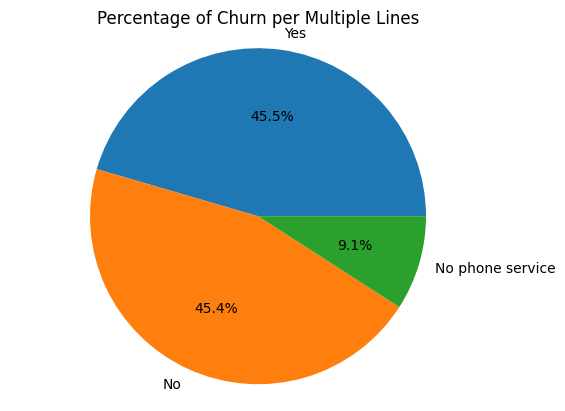

In [ ]:
# Calculate value counts of 'MultipleLines' for churned customers
churn_multiplelines_counts = df[df['Churn'] == 'Yes']['MultipleLines'].value_counts()

# Create a DataFrame with counts and MultipleLines values
churn_multiplelines_df = pd.DataFrame({'Count': churn_multiplelines_counts.values}, index=churn_multiplelines_counts.index)

# Plot the pie chart
plt.pie(churn_multiplelines_df['Count'], labels=churn_multiplelines_df.index, autopct='%.1f%%')

# Set the title of the plot
plt.title('Percentage of Churn per Multiple Lines')

# Set aspect ratio to 'equal' for a circular pie chart
plt.axis('equal')

# Display the chart
plt.show()

As shown in the above pie chart, it is observed that customers with multiple lines and with no multiple lines are equally likely to churn while customers with no phone service has the least likelihood of churning.

Hence, multiple line factor does NOT seem to play a major role in our prediction model as a predictor of our target variable (Churn). Therefore, it can be **removed**.

#####5.2.2.10 Visualization of Customer Churn Percentages vs. Internet Service

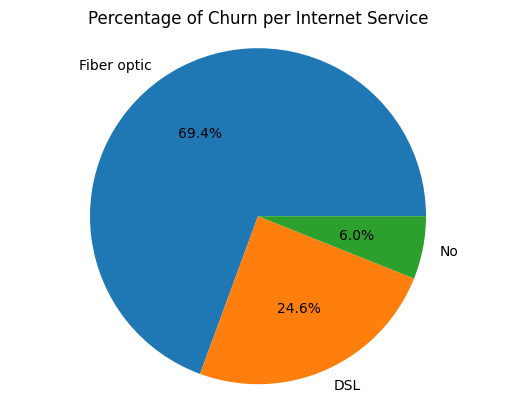

In [ ]:
# Calculate value counts of 'InternetService' for churned customers
churn_internet_counts = df[df['Churn'] == 'Yes']['InternetService'].value_counts()

# Create a DataFrame with counts and InternetService types
churn_internet_df = pd.DataFrame({'Count': churn_internet_counts.values}, index=churn_internet_counts.index)

# Plot the pie chart
plt.pie(churn_internet_df['Count'], labels=churn_internet_df.index, autopct='%.1f%%')

# Set the title of the plot
plt.title('Percentage of Churn per Internet Service')

# Set aspect ratio to 'equal' for a circular pie chart
plt.axis('equal')

# Display the chart
plt.show()

As shown in the above pie chart, it is observed that customers with fiber optic internet service are more likely to churn i.e. have a higher percentage of churn.

Hence, internet service plays a major role in our prediction model as a predictor of our target variable (Churn). Therefore, it can be **kept**.

#####5.2.2.11 Visualization of Customer Churn Percentages vs. Online Security

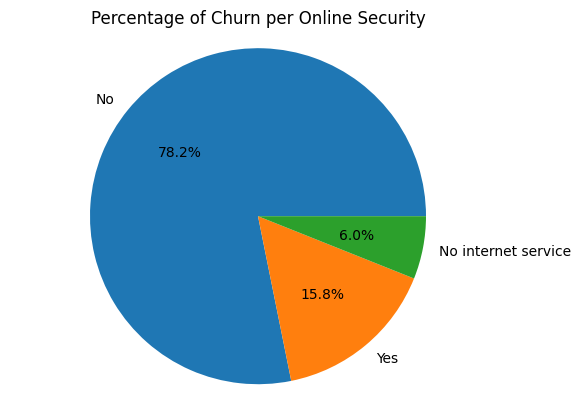

In [ ]:
# Calculate value counts of 'OnlineSecurity' for churned customers
churn_onlinesecurity_counts = df[df['Churn'] == 'Yes']['OnlineSecurity'].value_counts()

# Create a DataFrame with counts and OnlineSecurity values
churn_onlinesecurity_df = pd.DataFrame({'Count': churn_onlinesecurity_counts.values}, index=churn_onlinesecurity_counts.index)

# Plot the pie chart
plt.pie(churn_onlinesecurity_df['Count'], labels=churn_onlinesecurity_df.index, autopct='%.1f%%')

# Set the title of the plot
plt.title('Percentage of Churn per Online Security')

# Set aspect ratio to 'equal' for a circular pie chart
plt.axis('equal')

# Display the chart
plt.show()

As shown in the above pie chart, it is observed that customers with no online security are more likely to churn i.e. have a higher percentage of churn.

Hence, online security plays a major role in our prediction model as a predictor of our target variable (Churn). Therefore, it can be **kept**.

#####5.2.2.12 Visualization of Customer Churn Percentages vs. Online Backup

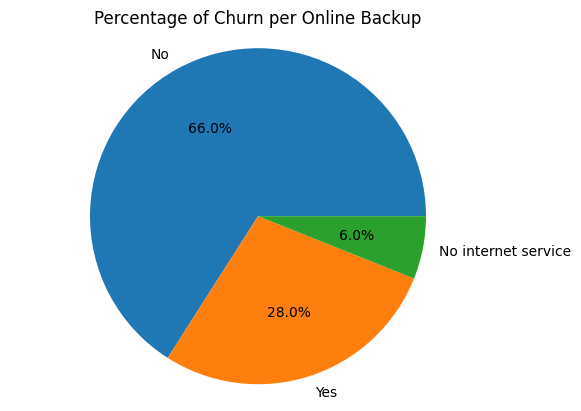

In [ ]:
# Calculate value counts of 'OnlineBackup' for churned customers
churn_onlinebackup_counts = df[df['Churn'] == 'Yes']['OnlineBackup'].value_counts()

# Create a DataFrame with counts and OnlineBackup values
churn_onlinebackup_df = pd.DataFrame({'Count': churn_onlinebackup_counts.values}, index=churn_onlinebackup_counts.index)

# Plot the pie chart
plt.pie(churn_onlinebackup_df['Count'], labels=churn_onlinebackup_df.index, autopct='%.1f%%')

# Set the title of the plot
plt.title('Percentage of Churn per Online Backup')

# Set aspect ratio to 'equal' for a circular pie chart
plt.axis('equal')

# Display the chart
plt.show()

As shown in the above pie chart, it is observed that customers with no online backup are more likely to churn i.e. have a higher percentage of churn.

Hence, online backup plays a major role in our prediction model as a predictor of our target variable (Churn). Therefore, it can be **kept**.

#####5.2.2.13 Visualization of Customer Churn Percentages vs. Device Protection

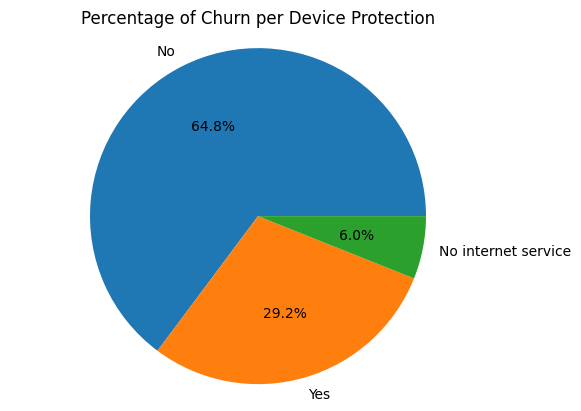

In [ ]:
# Calculate value counts of 'DeviceProtection' for churned customers
churn_deviceprotection_counts = df[df['Churn'] == 'Yes']['DeviceProtection'].value_counts()

# Create a DataFrame with counts and DeviceProtection values
churn_deviceprotection_df = pd.DataFrame({'Count': churn_deviceprotection_counts.values}, index=churn_deviceprotection_counts.index)

# Plot the pie chart
plt.pie(churn_deviceprotection_df['Count'], labels=churn_deviceprotection_df.index, autopct='%.1f%%')

# Set the title of the plot
plt.title('Percentage of Churn per Device Protection')

# Set aspect ratio to 'equal' for a circular pie chart
plt.axis('equal')

# Display the chart
plt.show()

As shown in the above pie chart, it is observed that customers with no device protection are more likely to churn i.e. have a higher percentage of churn.

Hence, device protection plays a major role in our prediction model as a predictor of our target variable (Churn). Therefore, it can be **kept**.

#####5.2.2.14 Visualization of Customer Churn Percentages vs. Tech Support

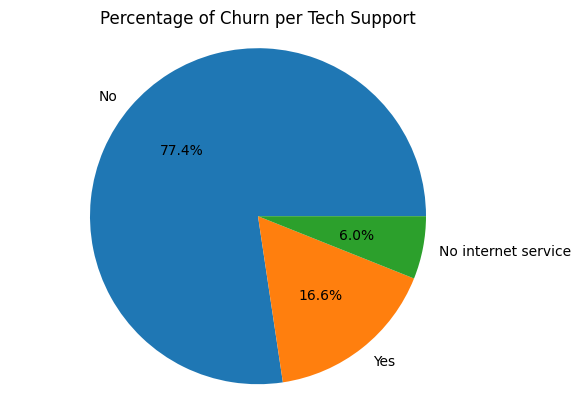

In [ ]:
# Calculate value counts of 'TechSupport' for churned customers
churn_techsupport_counts = df[df['Churn'] == 'Yes']['TechSupport'].value_counts()

# Create a DataFrame with counts and TechSupport values
churn_techsupport_df = pd.DataFrame({'Count': churn_techsupport_counts.values}, index=churn_techsupport_counts.index)

# Plot the pie chart
plt.pie(churn_techsupport_df['Count'], labels=churn_techsupport_df.index, autopct='%.1f%%')

# Set the title of the plot
plt.title('Percentage of Churn per Tech Support')

# Set aspect ratio to 'equal' for a circular pie chart
plt.axis('equal')

# Display the chart
plt.show()

As shown in the above pie chart, it is observed that customers with no tech support are more likely to churn i.e. have a higher percentage of churn.

Hence, tech support plays a major role in our prediction model as a predictor of our target variable (Churn). Therefore, it can be **kept**.

#####5.2.2.15 Visualization of Customer Churn Percentages vs. Streaming TV

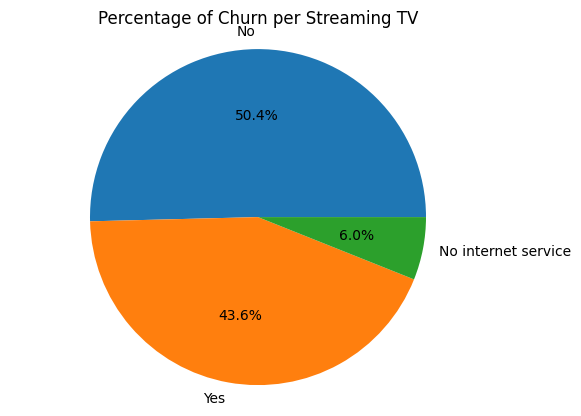

In [ ]:
# Calculate value counts of 'StreamingTV' for churned customers
churn_streamingtv_counts = df[df['Churn'] == 'Yes']['StreamingTV'].value_counts()

# Create a DataFrame with counts and StreamingTV values
churn_streamingtv_df = pd.DataFrame({'Count': churn_streamingtv_counts.values}, index=churn_streamingtv_counts.index)

# Plot the pie chart
plt.pie(churn_streamingtv_df['Count'], labels=churn_streamingtv_df.index, autopct='%.1f%%')

# Set the title of the plot
plt.title('Percentage of Churn per Streaming TV')

# Set aspect ratio to 'equal' for a circular pie chart
plt.axis('equal')

# Display the chart
plt.show()

As shown in the above pie chart, it is observed that customers with or without streaming TV are almost equally likely to churn while customers with no internet service has the least likelihood of churning.

Hence, streaming TV factor factor does NOT seem to play a major role in our prediction model as a predictor of our target variable (Churn). Therefore, it can be **removed**.

#####5.2.2.16 Visualization of Customer Churn Percentages vs. Streaming Movies

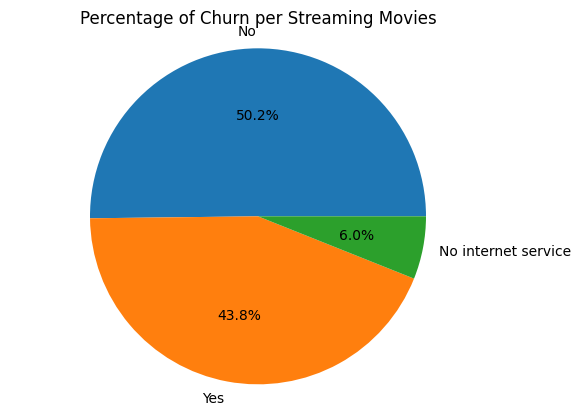

In [ ]:
# Calculate value counts of 'StreamingMovies' for churned customers
churn_streamingmovies_counts = df[df['Churn'] == 'Yes']['StreamingMovies'].value_counts()

# Create a DataFrame with counts and StreamingMovies values
churn_streamingmovies_df = pd.DataFrame({'Count': churn_streamingmovies_counts.values}, index=churn_streamingmovies_counts.index)

# Plot the pie chart
plt.pie(churn_streamingmovies_df['Count'], labels=churn_streamingmovies_df.index, autopct='%.1f%%')

# Set the title of the plot
plt.title('Percentage of Churn per Streaming Movies')

# Set aspect ratio to 'equal' for a circular pie chart
plt.axis('equal')

# Display the chart
plt.show()

As shown in the above pie chart, it is observed that customers with or without streaming movies are almost equally likely to churn while customers with no internet service has the least likelihood of churning.

Hence, streaming movies factor factor does NOT seem to play a major role in our prediction model as a predictor of our target variable (Churn). Therefore, it can be **removed**.

###5.3 Outlier Detection

Outlier detection techniques are applied to identify observations that deviate significantly from the majority of the data points.

It's important to note that the term "outlier" is commonly associated with numerical data and refers to observations that deviate significantly from the majority of the data points.

For categorical data (which is the case in our dataset), the concept of outliers is not as well-defined, so we focused on identifying rare or unexpected categories rather than outliers in the traditional sense.

In [ ]:
# Calculate value counts of the 'Churn' variable
churn_counts = df1['Churn'].value_counts()

# Set a threshold for identifying unusual categories
threshold = 0.05

# Identify unusual categories
unusual_categories = churn_counts[churn_counts < threshold * len(df1)]

# Print the unusual categories
print(unusual_categories)

Series([], Name: Churn, dtype: int64)


no unusual categories are found, which is also confirmed by our manual check on the CSV file outside of this environment. Hence, there are no outliers in this dataset.

###5.4 Correlation Analysis

This subsection investigates the relationships between variables through correlation analysis. It mainly calculates correlation coefficients which help identify variables that exhibit significant relationships or potential multicollinearity.

####5.4.1 Correlation Analysis between Monthly Charges & Total Charges (Continuous Variables) - Pearson's test

In [ ]:
# Select the two variables of interest
monthly_charges = df1['MonthlyCharges']
total_charges = df1['TotalCharges']

# Calculate the correlation coefficient
correlation = np.corrcoef(monthly_charges, total_charges)[0, 1]

# Print the correlation coefficient
print("Correlation coefficient between MonthlyCharges and TotalCharges:", correlation)

Correlation coefficient between MonthlyCharges and TotalCharges: 0.6510648032262027


This indicates a moderately positive correlation between the two variables. A correlation coefficient of 0.651 suggests that there is a tendency for Monthly Charges and Total Charges to increase together, but the relationship is not extremely strong.

Total Charges shall be **removed** to fulfill the assumption of no multicollinearity among independent (predictor) variables for Logistic Regression.

####5.4.2 Correlation Analysis between Multiple Lines & Phone Service (Categorical Variables) - Chi-square Test

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table of the two categorical variables
contingency_table = pd.crosstab(df['MultipleLines'], df['PhoneService'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p_value)

Chi-square statistic: 7043.0
P-value: 0.0


The chi-square statistic of 7043.0 indicates the strength of the association between the variables. A higher chi-square value suggests a stronger association.

The p-value of 0.0 indicates that the association between MultipleLines and PhoneService is statistically significant. Since the p-value is below the common significance level of 0.05, we can reject the null hypothesis of independence. This means that there is evidence to suggest that Multiple Lines and Phone Service are not independent and may be correlated.

In summary, the results indicate that there is a significant association between MultipleLines and PhoneService, suggesting the presence of multicollinearity between these categorical variables.

Multiple Lines shall be **removed** to fulfill the assumption of no multicollinearity among independent (predictor) variables for Logistic Regression.

####5.4.3 Correlation Analysis between Streaming TV & Streaming Movies (Categorical Variables) - Chi-square Test

In [ ]:
# Create a contingency table of the two categorical variables
contingency_table = pd.crosstab(df['StreamingTV'], df['StreamingMovies'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p_value)

Chi-square statistic: 8374.206314231764
P-value: 0.0


The chi-square statistic of 8374.2 indicates the strength of the association between the variables. A higher chi-square value suggests a stronger association.

The p-value of 0.0 indicates that the association between StreamingTV & StreamingMovies is statistically significant. Since the p-value is below the common significance level of 0.05, we can reject the null hypothesis of independence. This means that there is evidence to suggest that StreamingTV & StreamingMovies are not independent and may be correlated.

In summary, the results indicate that there is a significant association between StreamingTV & StreamingMovies, suggesting the presence of multicollinearity between these categorical variables.

StreamingMovies shall be **removed** to fulfill the assumption of no multicollinearity among independent (predictor) variables for Logistic Regression.

**In conclusion, Total Charges, Streaming Movies & Multiple Lines will be removed from our dataset to ensure the fullfillment of no multicollinearity assumption got Logistic Regression.**

*Before proceeding with the model development, the dataset should be encoded.*

In [ ]:
# Copy the original dataframe
df_encoded = df1.copy()

# Label encoding for binary categorical variables
binary_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
label_encoder = LabelEncoder()
for col in binary_cols:
    if df_encoded[col].nunique() == 2:
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# One-hot encoding for categorical variables with more than two levels
categorical_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
for col in categorical_cols:
    if df_encoded[col].nunique() > 2:
        encoded_cols = pd.get_dummies(df_encoded[col], prefix=col)
        df_encoded = pd.concat([df_encoded, encoded_cols], axis=1)
        df_encoded.drop(col, axis=1, inplace=True)

# Perform label encoding for the target variable
df_encoded['Churn'] = label_encoder.fit_transform(df_encoded['Churn'])

# Print the encoded dataframe
print(df_encoded)

      PaperlessBilling  MonthlyCharges  TotalCharges  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  Churn  MultipleLines_No  MultipleLines_No phone service  MultipleLines_Yes  InternetService_DSL  InternetService_Fiber optic  InternetService_No  OnlineSecurity_No  OnlineSecurity_No internet service  OnlineSecurity_Yes  OnlineBackup_No  OnlineBackup_No internet service  OnlineBackup_Yes  DeviceProtection_No  DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No  TechSupport_No internet service  TechSupport_Yes  StreamingTV_No  StreamingTV_No internet service  StreamingTV_Yes  StreamingMovies_No  StreamingMovies_No internet service  StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  Contract_Two year  PaymentMethod_Bank transfer (automatic)  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  PaymentMethod_Mailed check
0                    1           29.85         29.85       0              0        1           0 

In [ ]:
#New Dataframe Datatypes
df_encoded.dtypes

PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
Churn                                        int64
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No                            uint8
OnlineSecurity_No internet service           uint8
OnlineSecurity_Yes                           uint8
OnlineBackup_No                

All variables are now encoded.

##6. Model Development

In [ ]:
# Separate the features (x) and target variable (y)
x=df_encoded.drop('Churn', axis=1) #feature dataset
y=df_encoded['Churn'] #target dataset

# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the numeric data
# Create the scaler
scaler = StandardScaler()

# Scale the 'MonthlyCharges' and 'TotalCharges' columns on the training dataset
x_train_scaled = x_train.copy()
x_train_scaled[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(x_train[['MonthlyCharges', 'TotalCharges']])

x_test_scaled = x_test.copy()
x_test_scaled[['MonthlyCharges', 'TotalCharges']] = scaler.transform(x_test[['MonthlyCharges', 'TotalCharges']])

# Print the scaled training dataset
print(x_train_scaled)
print(x_test_scaled)

      PaperlessBilling  MonthlyCharges  TotalCharges  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines_No  MultipleLines_No phone service  MultipleLines_Yes  InternetService_DSL  InternetService_Fiber optic  InternetService_No  OnlineSecurity_No  OnlineSecurity_No internet service  OnlineSecurity_Yes  OnlineBackup_No  OnlineBackup_No internet service  OnlineBackup_Yes  DeviceProtection_No  DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No  TechSupport_No internet service  TechSupport_Yes  StreamingTV_No  StreamingTV_No internet service  StreamingTV_Yes  StreamingMovies_No  StreamingMovies_No internet service  StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  Contract_Two year  PaymentMethod_Bank transfer (automatic)  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  PaymentMethod_Mailed check
6030                 1       -0.518620     -0.087908       0              0        0           0      43

In [ ]:
#create the model
model = LogisticRegression(max_iter=1000)
#train the model
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

##7. Model Evaluation Metrics

In [ ]:
#predictions on the test data
predictions = model.predict(x_test)
#check precision , recall and f1 score for our model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.62      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.72      1407
weighted avg       0.78      0.79      0.78      1407



Based on the above, the below can be concluded:



1.   Precision: Precision is the ratio of true positive predictions to the total predicted positives.

*   For class 0 (no churn), the precision is 0.84, which means that out of all the instances predicted as class 0, 84% were actually correct.
*   For class 1 (churn), the precision is 0.62, indicating that 62% of the instances predicted as class 1 were correct.

2.   Recall: Recall, also known as sensitivity or true positive rate, is the ratio of true positives to the total actual positives.

*   For class 0, the recall is 0.89, meaning that the model correctly identified 89% of the actual instances of class 0.
*   For class 1, the recall is 0.52, indicating that the model only captured 52% of the actual instances of class 1.

3. F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.

*   For class 0, the F1-score is 0.86
*   For class 1, it is 0.57.

4. Support: Support is the number of instances in each class.

*   For class 0, the support is 1033
*   For class 1, it is 374.

5. Accuracy: Accuracy is the ratio of correct predictions to the total number of instances. In this case, the model achieved an accuracy of 0.79, meaning it correctly predicted 79% of the instances.

These metrics provide an overall assessment of the model's performance in classifying churn and non-churn instances. It indicates that the model has relatively higher accuracy, precision, recall, and F1-score for class 0 (no churn) compared to class 1 (churn). This is mainly caused by the fact that the provided dataset is imbalanced i.e. it has significantly higher counts of no-churn in compairosn with churn counts as shown in previous sections.

In [ ]:
# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase the max_iter value
model.fit(X, y)

# Get the coefficients
coefficients = model.coef_[0]

# Get the feature names
feature_names = X.columns

# Create a dictionary to store feature importance
feature_importance = dict(zip(feature_names, coefficients))

# Sort the features based on their absolute coefficient values
sorted_importance = sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)

# Print the feature importance
for feature, importance in sorted_importance:
    print(f"{feature}: {importance}")

Contract_Month-to-month: 0.5275147727398928
Contract_Two year: -0.5184240852572496
PaperlessBilling: 0.39432854748979695
InternetService_DSL: -0.39376844766976227
InternetService_Fiber optic: 0.354385902901069
PhoneService: -0.29636575356638734
MultipleLines_No: -0.2573359336035756
SeniorCitizen: 0.24857318744445292
OnlineSecurity_Yes: -0.21992899217529063
PaymentMethod_Electronic check: 0.21766583468732634
TechSupport_Yes: -0.2133451128036323
Contract_One year: -0.1903259678213596
OnlineSecurity_No: 0.1805464474215702
PaymentMethod_Credit card (automatic): -0.1749310698713013
TechSupport_No: 0.17396256807368607
Dependents: -0.16827785150371932
PaymentMethod_Mailed check: -0.14485516188357292
InternetService_No: -0.1418527355573382
OnlineSecurity_No internet service: -0.1418527355573382
OnlineBackup_No internet service: -0.1418527355573382
DeviceProtection_No internet service: -0.1418527355573382
TechSupport_No internet service: -0.1418527355573382
StreamingTV_No internet service: -0.1

Basedon the above, here are the top five factors that have the most impact on customer churn based on the coefficient values:



1.   Contract_Month-to-month: 0.5275147727398928: Customers with a month-to-month contract have a strong positive association with churn, indicating that they are more likely to churn compared to customers with other contract types.
2.   Contract_Two year: -0.5184240852572496: Customers with a two-year contract have a strong negative association with churn, suggesting that they are less likely to churn compared to customers with other contract types.
3. PaperlessBilling: 0.39432854748979695: Customers who have paperless billing are positively associated with churn, indicating a higher likelihood of churn compared to customers without paperless billing.
4. InternetService_DSL: -0.39376844766976227: Customers with DSL internet service have a negative association with churn, suggesting they are less likely to churn compared to customers with other internet service types.
5. InternetService_Fiber optic: 0.354385902901069: Customers with fiber optic internet service have a positive association with churn, indicating a higher likelihood of churn compared to customers with other internet service types.

These factors play a significant role in predicting customer churn and can help SkyOne understand which features have the most impact on the outcome.




